<a href="https://colab.research.google.com/github/Anzal-hussain-Anzal/Anzal-hussain-Anzal/blob/main/facial%20emotion%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: instal kaggle and take jeson file

!pip install kaggle

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 67 bytes
mv: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 85% 102M/121M [00:00<00:00, 211MB/s] 
100% 121M/121M [00:00<00:00, 200MB/s]


In [4]:
# prompt: /content/face-expression-recognition-dataset.zip write code to unzip it

!unzip /content/face-expression-recognition-dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/images/validation/fear/8797.jpg  
  inflating: /content/images/validation/fear/8818.jpg  
  inflating: /content/images/validation/fear/886.jpg  
  inflating: /content/images/validation/fear/9037.jpg  
  inflating: /content/images/validation/fear/9040.jpg  
  inflating: /content/images/validation/fear/9101.jpg  
  inflating: /content/images/validation/fear/911.jpg  
  inflating: /content/images/validation/fear/9179.jpg  
  inflating: /content/images/validation/fear/9205.jpg  
  inflating: /content/images/validation/fear/9232.jpg  
  inflating: /content/images/validation/fear/9251.jpg  
  inflating: /content/images/validation/fear/9261.jpg  
  inflating: /content/images/validation/fear/9281.jpg  
  inflating: /content/images/validation/fear/9302.jpg  
  inflating: /content/images/validation/fear/9333.jpg  
  inflating: /content/images/validation/fear/9369.jpg  
  inflating: /content/images/validation/fear/9370.jpg  

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


901/901 ━━━━━━━━━━━━━━━━━━━━ 55s 55ms/step - accuracy: 0.1517 - loss: 2.2423 - val_accuracy: 0.1468 - val_loss: 1.9421
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.1665 - loss: 1.9006 - val_accuracy: 0.1462 - val_loss: 1.8388
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.2223 - loss: 1.8864 - val_accuracy: 0.1980 - val_loss: 1.8361
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.2223 - loss: 1.8450 - val_accuracy: 0.2288 - val_loss: 1.8015
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.2548 - loss: 1.7919 - val_accuracy: 0.2215 - val_loss: 1.8030
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.2739 - loss: 1.7627 - val_accuracy: 0.3295 - val_loss: 1.6983
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2973 - loss: 1.7266 - val_accuracy: 0.3684 - val_loss: 1.7128
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.3131 - loss: 1.7136 - val_accurac

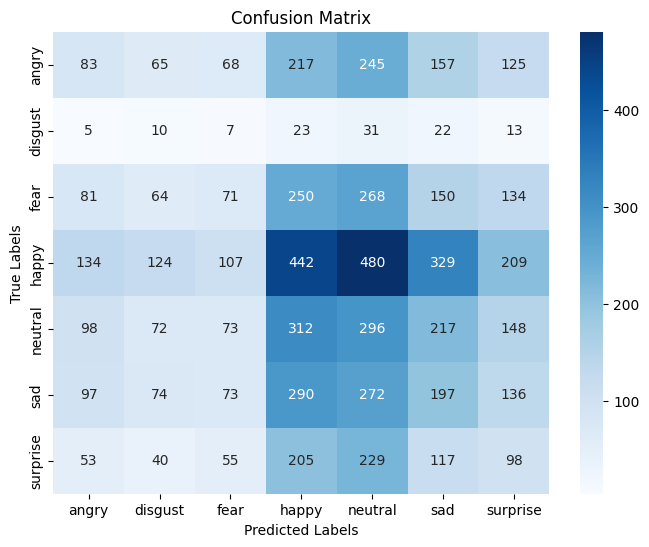

              precision    recall  f1-score   support

       angry       0.15      0.09      0.11       960
     disgust       0.02      0.09      0.04       111
        fear       0.16      0.07      0.10      1018
       happy       0.25      0.24      0.25      1825
     neutral       0.16      0.24      0.19      1216
         sad       0.17      0.17      0.17      1139
    surprise       0.11      0.12      0.12       797

    accuracy                           0.17      7066
   macro avg       0.15      0.15      0.14      7066
weighted avg       0.18      0.17      0.17      7066



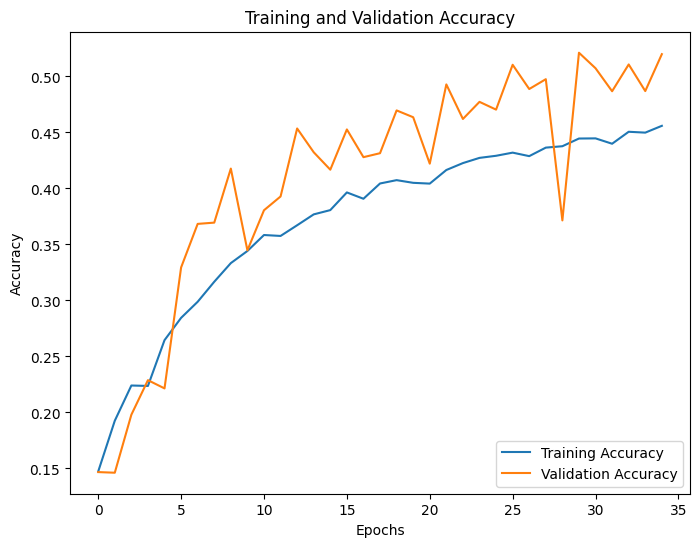

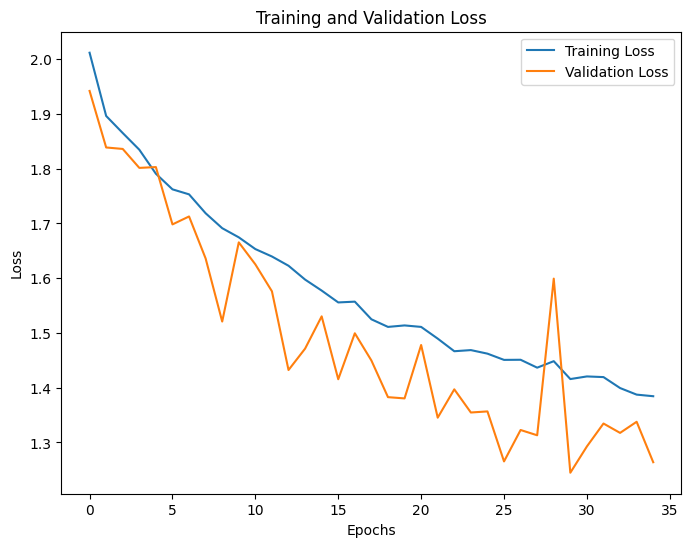

ValueError: Asked to retrieve element 228, but the Sequence has length 221

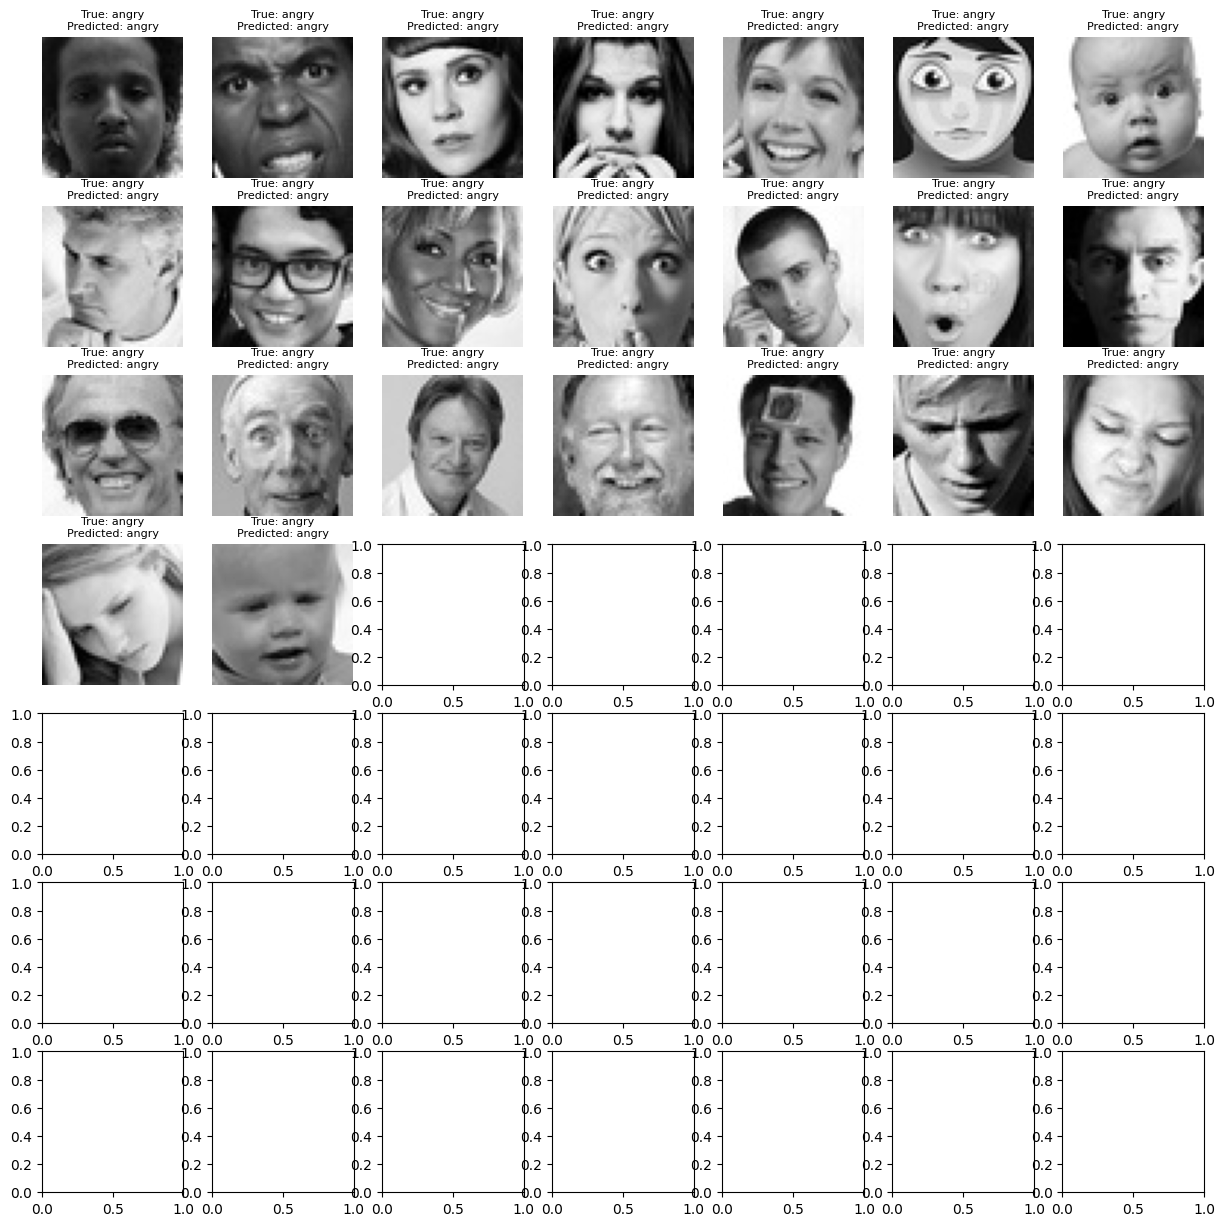

In [18]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the paths to the dataset
train_dir = '/content/images/train'
validation_dir = '/content/images/validation'

# Define the image size and batch size
IMG_SIZE = 48
BATCH_SIZE = 32

# Data augmentation and preprocessing for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of tensor image data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical'
)

# Compute class weights to handle imbalanced data
train_labels = train_generator.classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_dict = dict(enumerate(class_weights))

# Define the CNN model architecture
model = Sequential()

# First Conv layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer for 7 classes
model.add(Dense(7, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

# Evaluate the model
validation_loss, validation_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_acc}")

# Generate predictions for validation set
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Get indices where predictions were correct
correct_indices = np.where(y_true == y_pred)[0]

# Plot the first 49 correct predictions
fig, axes = plt.subplots(7, 7, figsize=(15, 15))  # 7x7 grid for 49 images
axes = axes.flatten()

for ax, idx in zip(axes, correct_indices[:49]):  # Show first 49 correct predictions
    img = validation_generator[idx][0][0]  # Get the image
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    true_label = list(validation_generator.class_indices.keys())[y_true[idx]]
    pred_label = list(validation_generator.class_indices.keys())[y_pred[idx]]
    ax.set_title(f"True: {true_label}\nPredicted: {pred_label}", fontsize=8)
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Define the paths to the dataset
train_dir = '/content/images/train'
validation_dir = '/content/images/validation'

# Define the image size and batch size
IMG_SIZE = 48
BATCH_SIZE = 32

# Data augmentation and preprocessing for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Increased rotation for better generalization
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of tensor image data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical'
)

# Compute class weights to handle imbalanced data
train_labels = train_generator.classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_dict = dict(enumerate(class_weights))

# Define the CNN model architecture
model = Sequential()

# First Conv layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Conv layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer for 7 classes
model.add(Dense(7, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Learning rate reduction on plateau
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001, verbose=1)

# Model checkpointing
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, lr_reduction, checkpoint]
)

# Evaluate the model
validation_loss, validation_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_acc}")

# Load the best saved model (if it improves)
model.load_weights('best_model.h5')

# Generate predictions for validation set
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys())))

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Get indices of correct predictions
correct_indices = np.where(y_true == y_pred)[0]

# Create a dictionary to hold images by class
class_images = {i: [] for i in range(len(train_generator.class_indices))}

# Populate the dictionary with correct predictions
for idx in correct_indices:
    label = y_true[idx]
    class_images[label].append(validation_generator[idx][0][0])  # Append the image

# Plot the first 7 images from each class
fig, axes = plt.subplots(7, len(class_images), figsize=(20, 20))  # 7 rows for classes, cols for number of classes
fig.subplots_adjust(hspace=0.5)

for class_index, (class_label, images) in enumerate(class_images.items()):
    for img_index in range(min(7, len(images))):  # Get up to 7 images for each class
        ax = axes[img_index, class_index]
        ax.imshow(images[img_index], cmap='gray')
        ax.axis('off')
        true_label = list(validation_generator.class_indices.keys())[class_label]
        pred_label = list(validation_generator.class_indices.keys())[y_pred[correct_indices[img_index]]]
        ax.set_title(f"True: {true_label}\nPredicted: {pred_label}", fontsize=8)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [19]:
# prompt: write code to save model

# Save the model
model.save('my_model.h5')

# Download the saved model file
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>